# Movie Recommendation System

In [ ]:
!pip install nltk scikit-learn numpy pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
original_df = pd.read_csv('imdb_top_1000.csv', engine='python', on_bad_lines='skip')
original_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
original_df.shape

(1000, 16)

In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [ ]:
required_columns = ["Genre","Overview","Series_Title"]
processed_df = original_df[required_columns]
processed_df.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genre         1000 non-null   object
 1   Overview      1000 non-null   object
 2   Series_Title  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
processed_df.isnull().sum()

,0
Genre,0
Overview,0
Series_Title,0


In [ ]:
# removing rows with missing value
processed_df = processed_df.dropna().reset_index(drop=True)
processed_df.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


In [ ]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genre         1000 non-null   object
 1   Overview      1000 non-null   object
 2   Series_Title  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


In [ ]:
processed_df.isnull().sum()

,0
Genre,0
Overview,0
Series_Title,0


In [ ]:
processed_df['combined'] = processed_df['Genre'] + ' ' + processed_df['Overview']
processed_df.head()

,Genre,Overview,Series_Title,combined
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption,Drama Two imprisoned men bond over a number of...
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather,"Crime, Drama An organized crime dynasty's agin..."
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight,"Action, Crime, Drama When the menace known as ..."
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II,"Crime, Drama The early life and career of Vito..."
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men,"Crime, Drama A jury holdout attempts to preven..."


In [ ]:
# convert dataframe to csv
processed_df.to_csv('processed_movies.csv', index=False)
original_df.to_csv('original_movies.csv', index=False)

In [ ]:
data = processed_df[['Series_Title','combined']]
data.head()

,Series_Title,combined
0,The Shawshank Redemption,Drama Two imprisoned men bond over a number of...
1,The Godfather,"Crime, Drama An organized crime dynasty's agin..."
2,The Dark Knight,"Action, Crime, Drama When the menace known as ..."
3,The Godfather: Part II,"Crime, Drama The early life and career of Vito..."
4,12 Angry Men,"Crime, Drama A jury holdout attempts to preven..."


In [ ]:
data.shape

(1000, 2)

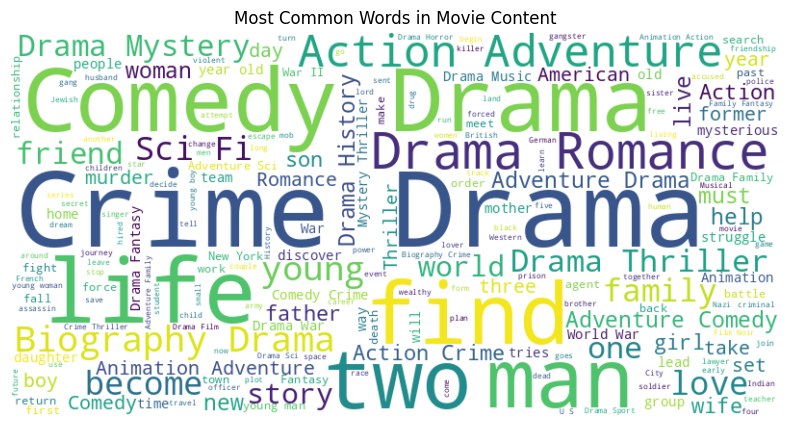

In [ ]:
# worldcloud for movie content
combined_text = ' '.join(data['combined'])   #Combine all movie content into one string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)  #Generate the WordCloud

# WordColud to visualize the most common words in the movie content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Movie Content')
plt.show()

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_text(text):
  # remove special characters and numbers
  text = re.sub(r"[^a-zA-Z\s]","", text)
  # convert to lowercase
  text = text.lower()
  # Tokenize and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)

In [ ]:
# Applying preprocessing to the movie content
data['cleaned_text'] = processed_df['combined'].apply(preprocess_text)
data.head()

<ipython-input-19-2641257612>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = processed_df['combined'].apply(preprocess_text)


,Series_Title,combined,cleaned_text
0,The Shawshank Redemption,Drama Two imprisoned men bond over a number of...,drama two imprisoned men bond number years fin...
1,The Godfather,"Crime, Drama An organized crime dynasty's agin...",crime drama organized crime dynastys aging pat...
2,The Dark Knight,"Action, Crime, Drama When the menace known as ...",action crime drama menace known joker wreaks h...
3,The Godfather: Part II,"Crime, Drama The early life and career of Vito...",crime drama early life career vito corleone ne...
4,12 Angry Men,"Crime, Drama A jury holdout attempts to preven...",crime drama jury holdout attempts prevent misc...


In [ ]:
# vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [ ]:
# Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [ ]:
print(cosine_sim)

[[1.         0.0040125  0.00309653 ... 0.00380174 0.00327447 0.        ]
 [0.0040125  1.         0.02810779 ... 0.00412513 0.003553   0.02331336]
 [0.00309653 0.02810779 1.         ... 0.00318345 0.0272921  0.03108129]
 ...
 [0.00380174 0.00412513 0.00318345 ... 1.         0.04868685 0.        ]
 [0.00327447 0.003553   0.0272921  ... 0.04868685 1.         0.        ]
 [0.         0.02331336 0.03108129 ... 0.         0.         1.        ]]


In [ ]:
print(cosine_sim[0])

[1.         0.0040125  0.00309653 0.00373087 0.00370199 0.04577356
 0.09292848 0.00343173 0.         0.00312803 0.0032678  0.00294908
 0.06545262 0.0029312  0.         0.00275367 0.         0.00364751
 0.00281842 0.00344654 0.07722406 0.00446992 0.02918072 0.
 0.00339014 0.00376956 0.00305384 0.02752611 0.00295656 0.01680828
 0.00257652 0.00428619 0.00358432 0.00282535 0.00304613 0.00409316
 0.02454073 0.00389763 0.00445009 0.00400963 0.00435282 0.
 0.00331705 0.0041636  0.         0.00346637 0.00474345 0.03003827
 0.         0.         0.0033633  0.00460525 0.00341036 0.00426024
 0.00292073 0.00307175 0.02794881 0.02156691 0.         0.00280656
 0.         0.         0.00368097 0.03355993 0.02160717 0.00332813
 0.         0.0038322  0.10977353 0.         0.         0.03648743
 0.         0.00321909 0.00377145 0.         0.00380311 0.00379602
 0.         0.00371273 0.00374987 0.         0.00433169 0.00348916
 0.05948982 0.00328956 0.00388369 0.00411548 0.00284564 0.00315919
 0.00417938

In [ ]:
import joblib
joblib.dump(cosine_sim, 'cosine_sim.pkl')

['cosine_sim.pkl']

In [ ]:
# Recommendation System
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
  # Find index of the movie
  idx = processed_df[processed_df['Series_Title'].str.lower() == movie_name.lower()].index
  if len(idx) == 0:
    return "Movie not found in the dataset"
  idx = idx[0]

  # get similarity scores
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:top_n+1]

  # get movie indices
  movie_indices = [i[0] for i in sim_scores]

  # Return top n similar movies
  return processed_df[['Series_Title']].iloc[movie_indices]

In [ ]:
data['Series_Title']

,Series_Title
0,The Shawshank Redemption
1,The Godfather
2,The Dark Knight
3,The Godfather: Part II
4,12 Angry Men
...,...
995,Breakfast at Tiffany's
996,Giant
997,From Here to Eternity
998,Lifeboat


In [ ]:
row_index = processed_df[processed_df['Series_Title'] == "Giant"].index
print(row_index)

Index([996], dtype='int64')


In [ ]:
row_index = processed_df[processed_df['Series_Title'] == "Le Petit Prince"].index
print(row_index)

Index([741], dtype='int64')


In [ ]:
movie_name = data['Series_Title'][741]
print(movie_name)

Le Petit Prince


In [ ]:
# Example Recommendation
print(f"Recomendation for the movie {movie_name}")
recommendations = recommend_movies(movie_name, cosine_sim, data, top_n=5)
print(recommendations)

Recomendation for the movie Le Petit Prince
            Series_Title
219      Song of the Sea
46        Hotaru no haka
761  Toki o kakeru shôjo
624           Mr. Nobody
783             Coraline


In [ ]:
!pip install IMDbPY

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.2/297.2 kB 5.0 MB/s eta 0:00:00


In [ ]:
original_df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
#from imdb import IMDb
from IPython.display import Image, display
import pandas as pd
import ast  # for converting stringified list to list of dicts

# Load your original data
original_df = pd.read_csv("/content/imdb_top_1000.csv")

# Function to extract movie info and poster
def show_movie_details(title, df=original_df):
    # Search for the movie in the original DataFrame
    row = df[df['Series_Title'].str.lower() == title.lower()]

    if row.empty:
        print("Movie not found in dataset.")
        return

    row = row.iloc[0]  # get the first match

    # Extract fields
    overview = row['Overview'] if pd.notna(row['Overview']) else "No overview available"
    director = row['Director'] if pd.notna(row['Director']) else "Director not available"
    poster = row['Poster_Link'] if pd.notna(row['Poster_Link']) else "https://via.placeholder.com/300x450?text=No+Image"

    # Display results
    print(f"\n Title: {title}")
    print(f" Overview: {overview}")
    print(f"Director: {director}")
    display(Image(url=poster, width=300, height=450))

# Example
show_movie_details('Le Petit Prince')



 Title: Le Petit Prince
 Overview: A little girl lives in a very grown-up world with her mother, who tries to prepare her for it. Her neighbor, the Aviator, introduces the girl to an extraordinary world where anything is possible, the world of the Little Prince.
Director: Mark Osborne


In [ ]:
# Download the files to your local system
from google.colab import files
files.download('processed_movies.csv')
files.download('original_movies.csv')
files.download('cosine_sim.pkl')